# Analyzing Random Walks

In the homework, you simulated random walks and filled a numpy array with them. You then made a plot of the ratio of random walks of lengths M that returned to the origin *at some point*. 

Here is my solution:

[[  0.  -1.  -2. ..., -34. -35. -36.]
 [  0.  -1.  -2. ...,  24.  25.  24.]
 [  0.  -1.   0. ...,  30.  29.  30.]
 ..., 
 [  0.  -1.  -2. ...,  18.  19.  20.]
 [  0.  -1.   0. ..., -14. -15. -14.]
 [  0.  -1.   0. ..., -20. -19. -20.]]
[   0.    0.  505.  505.  631.  631.  696.  696.  745.  745.  777.  777.
  786.  786.  803.  803.  815.  815.  825.  825.  834.  834.  838.  838.
  847.  847.  852.  852.  859.  859.  863.  863.  864.  864.  867.  867.
  872.  872.  875.  875.  878.  878.  881.  881.  884.  884.  888.  888.
  890.  890.  893.  893.  896.  896.  896.  896.  901.  901.  902.  902.
  903.  903.  903.  903.  904.  904.  906.  906.  908.  908.  909.  909.
  910.  910.  911.  911.  912.  912.  914.  914.  914.  914.  916.  916.
  917.  917.  917.  917.  918.  918.  918.  918.  920.  920.  920.  920.
  921.  921.  921.  921.  923.  923.  924.  924.  926.  926.  928.  928.
  929.  929.  929.  929.  929.  929.  929.  929.  929.  929.  930.  930.
  931.  931.  931.  931.  931.  93

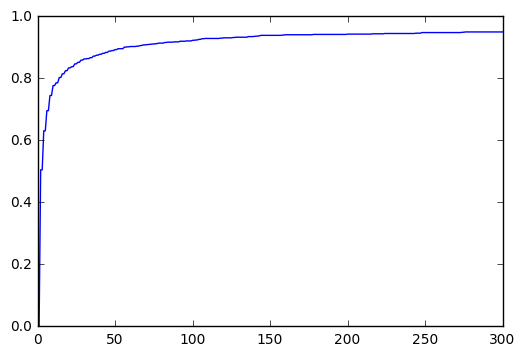

In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed(42)
def get_step():
    return -1 if random.randint(0,1) == 0 else 1
    # could have used random.choice([-1,1])

max_M = 300  # max length of random walk
N = 1000  # number of walks

simulations = np.zeros([N,max_M+1])

# fill the array with simulations
for i in range(N):
    for j in range(1,max_M+1):
        simulations[i,j] = simulations[i,j-1] + get_step()
    
print(simulations[:10])

# we now want to see the ratio of simulations up to length M that returned to zero
# we'll do this for every M and plot

numbers_of_walks_that_went_back_to_0 = np.zeros(max_M+1)

def has_zero(xs):
    for x in xs:
        if x == 0:
            return True
    return False

for M in range(1,max_M+1):
    for i in range(N):
        if has_zero(simulations[i,1:M+1]):   # don't want to count step 0
            numbers_of_walks_that_went_back_to_0[M] += 1

print(numbers_of_walks_that_went_back_to_0)
        
# to get the ratio, we need to divide by number of simulations (N=1000)
plt.plot(numbers_of_walks_that_went_back_to_0 / N)



As you can see, it is very likely that a random walk of length 300 will, at some point, return to the origin.

There is a very cool theorem about this:

**Theorem** (Polya's recurrence theorem) An infinite random walk in 1-dimensional or 2-dimensional grid returns to the origin at some point with probability 1. 

<br>

Let's plot many random walks. 

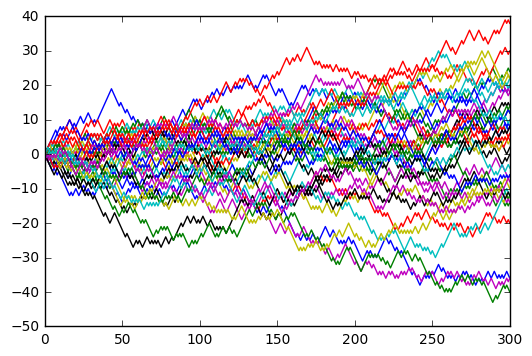

In [152]:
for i in range(40):
    plt.plot(range(max_M+1), simulations[i,:])

Let's look at the distribution of where the random walk will end after 10,20,100,200 steps. 

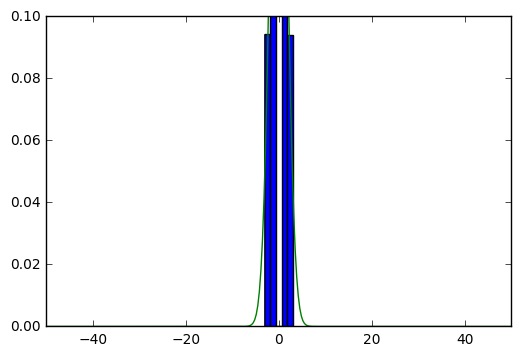

In [153]:
from math import sqrt, pi, e

def hist_and_fit(X, num_bins):
    # calculate mean and standard deviation. 
    mu = np.mean(X)
    sigma = np.std(X)
    
    Z = np.linspace(-50,50,300)
    plt.axis([-50,50,0,0.1])
    _, _, _ = plt.hist(X,num_bins, normed=True)
    
    guassian_func = lambda mu, sigma: lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma * sigma))
    plt.plot(Z, guassian_func(mu, sigma)(Z))
    

hist_and_fit(simulations[:, 3], 5)

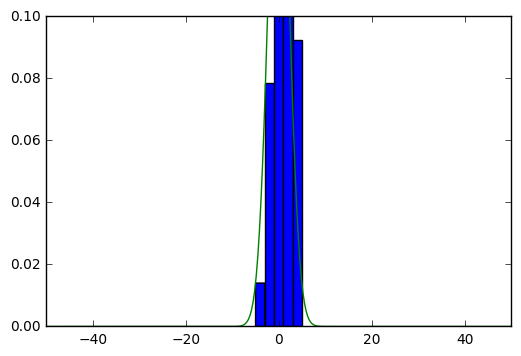

In [154]:
hist_and_fit(simulations[:, 5], 5)

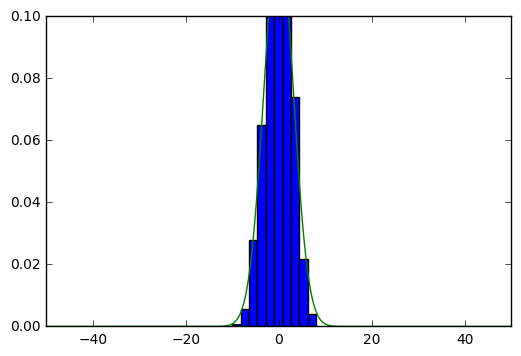

In [155]:
hist_and_fit(simulations[:, 10], 10)

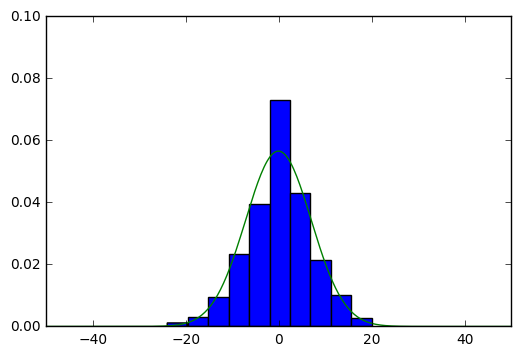

In [156]:
hist_and_fit(simulations[:, 50], 10)

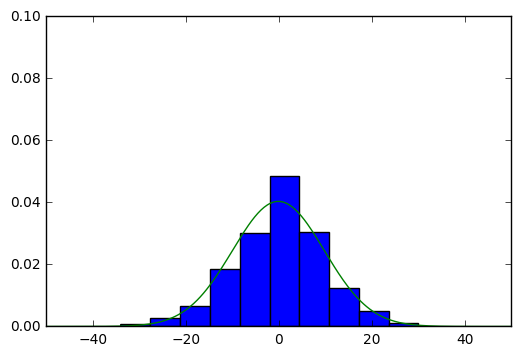

In [157]:
hist_and_fit(simulations[:, 100], 10)

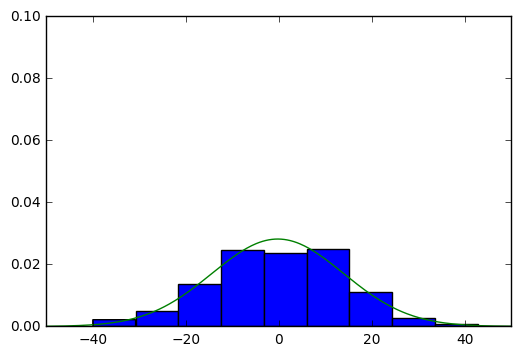

In [158]:
hist_and_fit(simulations[:, 200], 10)

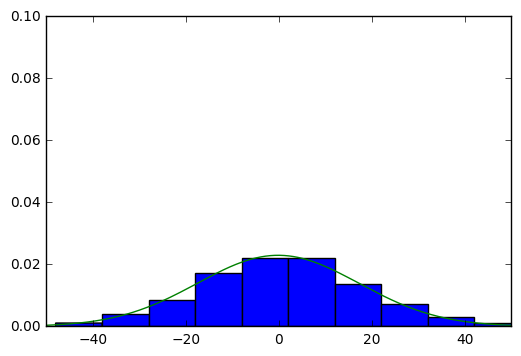

In [159]:
hist_and_fit(simulations[:, 300], 10)

Let's notice some things:

* The mean is always close to zero (makes sense?) 
* The histogram is looking more and more like a Gaussian
* The standard deviation is increasing (best fitting Gaussian is becoming wider)

Let's see how the standard deviation is changing as we increase the length of the random walk. 

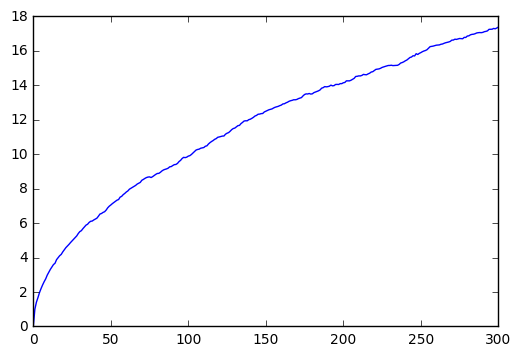

In [160]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, simulations)
plt.plot(range(max_M+1), stdevs_of_random_walks)

Which function does it look like? Square root?

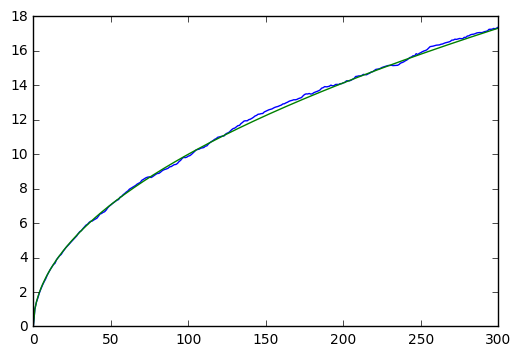

In [161]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, simulations)
plt.plot(range(max_M+1), stdevs_of_random_walks)
plt.plot(range(max_M+1), np.sqrt(np.array(range(max_M+1))))

Wow perfect fit!!!

## Next time:

We will learn about the **Law of Large Numbers**, and the **Central Limit Theorem**, which explain the behaviors that we are seeing. 